In [3]:
%load_ext sql

In [4]:
%sql sqlite:///C:\\Users\\AaronElias\\Desktop\\Github\\Prueba-Aaron\\20-lab-sql-select\\publications.db

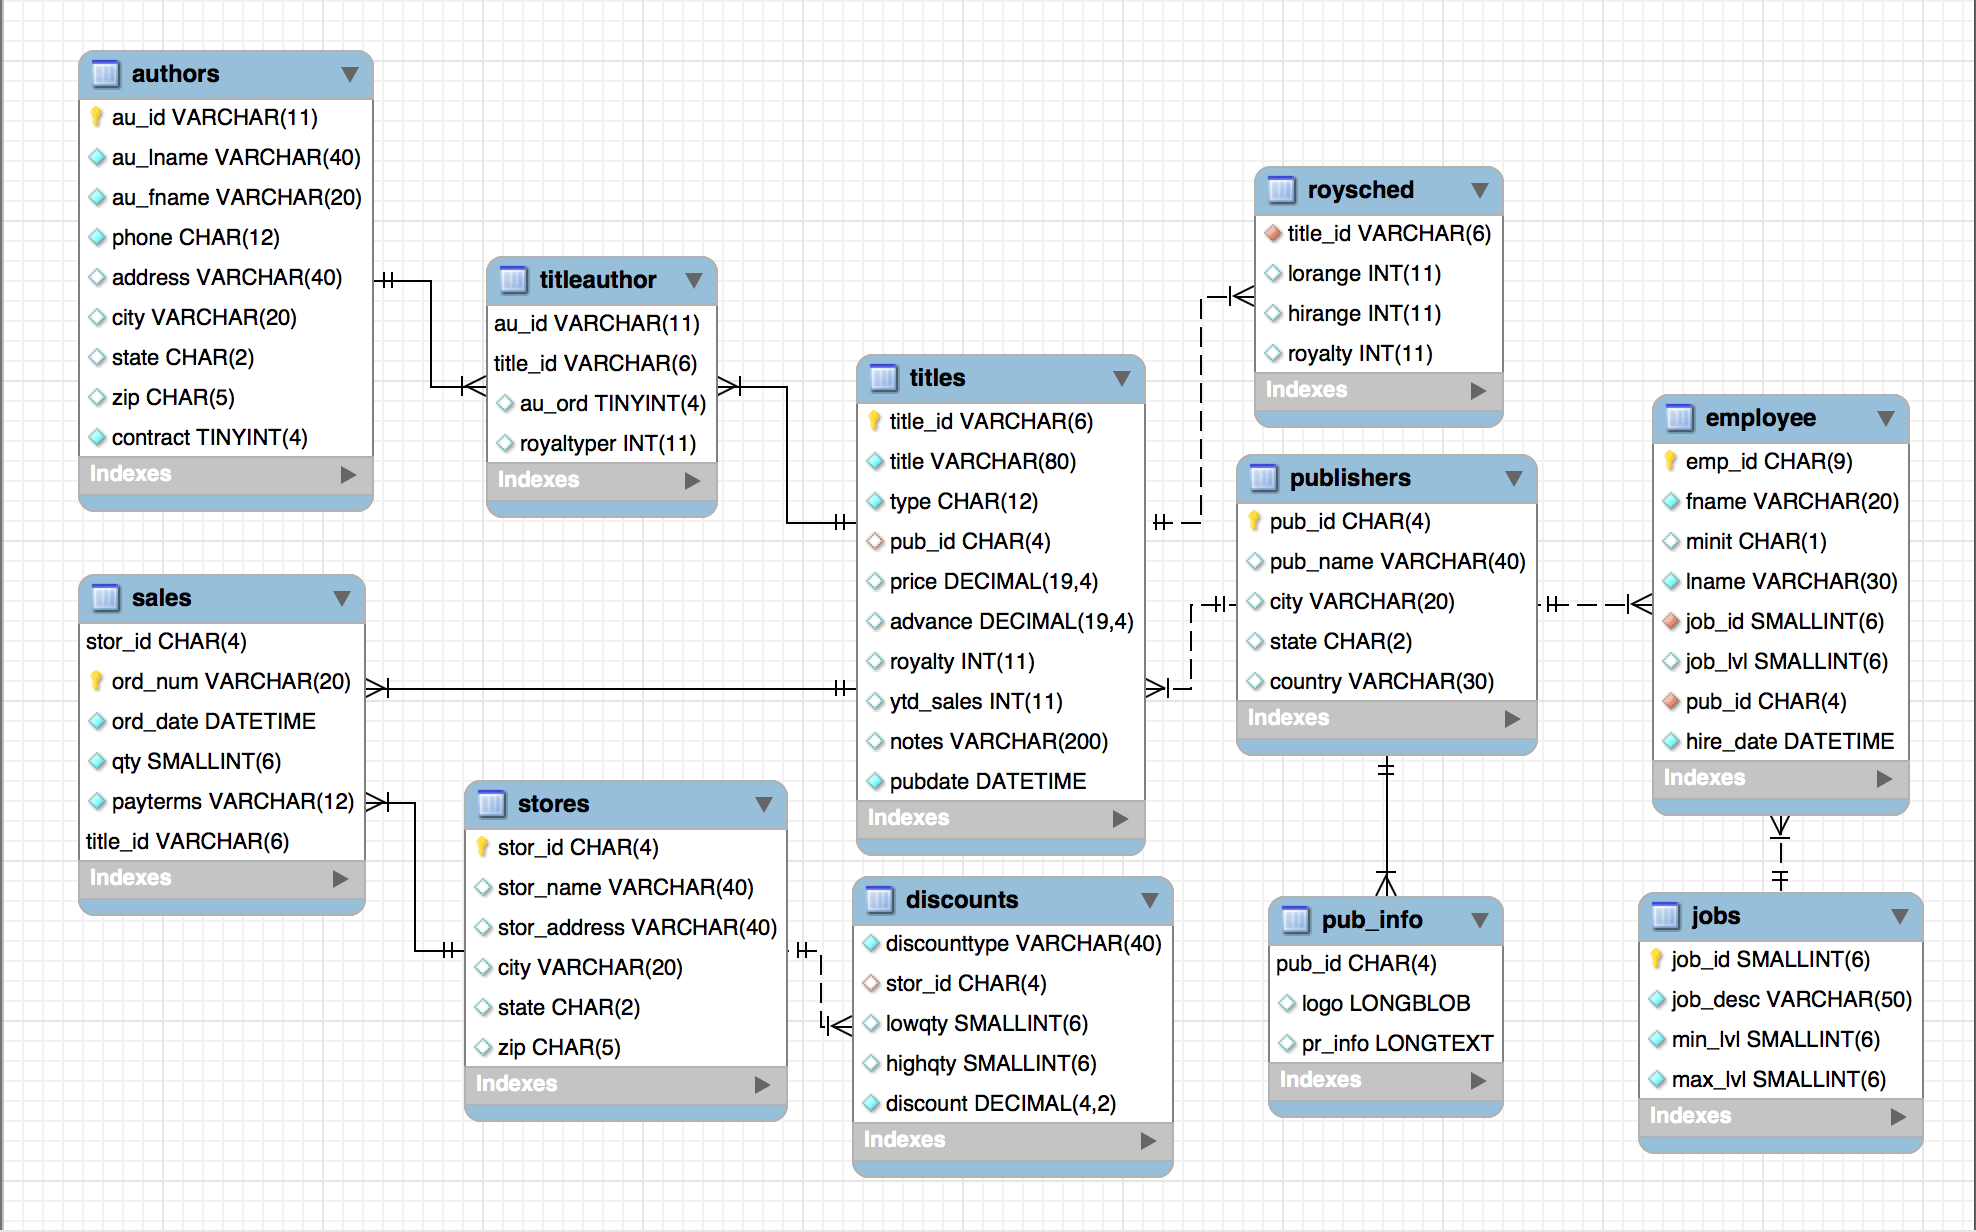

In [9]:
%%sql
select name
from sqlite_master
where type="table"
order by name;

 * sqlite:///C:\\Users\\AaronElias\\Desktop\\Github\\Prueba-Aaron\\20-lab-sql-select\\publications.db
Done.


name
authors
discounts
employee
jobs
pub_info
publishers
roysched
sales
stores
titleauthor


## Challenge 1 - Who Have Published What At Where?

In this challenge you will write a `SELECT` query that joins various tables to figure out what titles each author has published at which publishers. Your output should have at least the following columns:

* `AUTHOR_ID` - the ID of the author
* `LAST_NAME` - author last name
* `FIRST_NAME` - author first name
* `TITLE` - name of the published title
* `PUBLISHER` - name of the publisher where the title was published

Your output will look something like below:

![Challenge 1 output](challenge-1.png)

*Note: the screenshot above is not the complete output.*

If your query is correct, the total rows in your output should be the same as the total number of records in Table `titleauthor`.

In [45]:
%%sql
select a.au_id as author_id, a.au_lname as last_name, a.au_fname as first_name, t.title, p.pub_name
from authors as a join titleauthor as ta on a.au_id = ta.au_id
                  join titles as t on ta.title_id = t.title_id
                  join publishers as p on t.pub_id = p.pub_id
limit 10

 * sqlite:///C:\\Users\\AaronElias\\Desktop\\Github\\Prueba-Aaron\\20-lab-sql-select\\publications.db
Done.


author_id,last_name,first_name,title,pub_name
172-32-1176,White,Johnson,Prolonged Data Deprivation: Four Case Studies,New Moon Books
213-46-8915,Green,Marjorie,The Busy Executive's Database Guide,Algodata Infosystems
213-46-8915,Green,Marjorie,You Can Combat Computer Stress!,New Moon Books
238-95-7766,Carson,Cheryl,But Is It User Friendly?,Algodata Infosystems
267-41-2394,O'Leary,Michael,Cooking with Computers: Surreptitious Balance Sheets,Algodata Infosystems
267-41-2394,O'Leary,Michael,"Sushi, Anyone?",Binnet & Hardley
274-80-9391,Straight,Dean,Straight Talk About Computers,Algodata Infosystems
409-56-7008,Bennet,Abraham,The Busy Executive's Database Guide,Algodata Infosystems
427-17-2319,Dull,Ann,Secrets of Silicon Valley,Algodata Infosystems
472-27-2349,Gringlesby,Burt,"Sushi, Anyone?",Binnet & Hardley


In [10]:
%%sql
select count(*)
from authors as a join titleauthor as ta on a.au_id = ta.au_id
                  join titles as t on ta.title_id = t.title_id
                  join publishers as p on t.pub_id = p.pub_id


 * sqlite:///C:\\Users\\AaronElias\\Desktop\\Github\\Prueba-Aaron\\20-lab-sql-select\\publications.db
Done.


count(*)
25


In [46]:
%%sql
select count(*)
from titleauthor
limit 10

 * sqlite:///C:\\Users\\AaronElias\\Desktop\\Github\\Prueba-Aaron\\20-lab-sql-select\\publications.db
Done.


count(*)
25


In [26]:
%%sql
select *
from authors
limit 10

 * sqlite:///C:\\Users\\AaronElias\\Desktop\\Github\\Prueba-Aaron\\20-lab-sql-select\\publications.db
Done.


au_id,au_lname,au_fname,phone,address,city,state,zip,contract
172-32-1176,White,Johnson,408 496-7223,10932 Bigge Rd.,Menlo Park,CA,94025,1
213-46-8915,Green,Marjorie,415 986-7020,309 63rd St. #411,Oakland,CA,94618,1
238-95-7766,Carson,Cheryl,415 548-7723,589 Darwin Ln.,Berkeley,CA,94705,1
267-41-2394,O'Leary,Michael,408 286-2428,22 Cleveland Av. #14,San Jose,CA,95128,1
274-80-9391,Straight,Dean,415 834-2919,5420 College Av.,Oakland,CA,94609,1
341-22-1782,Smith,Meander,913 843-0462,10 Mississippi Dr.,Lawrence,KS,66044,0
409-56-7008,Bennet,Abraham,415 658-9932,6223 Bateman St.,Berkeley,CA,94705,1
427-17-2319,Dull,Ann,415 836-7128,3410 Blonde St.,Palo Alto,CA,94301,1
472-27-2349,Gringlesby,Burt,707 938-6445,PO Box 792,Covelo,CA,95428,1
486-29-1786,Locksley,Charlene,415 585-4620,18 Broadway Av.,San Francisco,CA,94130,1


In [27]:
%%sql
select *
from publishers
limit 10

 * sqlite:///C:\\Users\\AaronElias\\Desktop\\Github\\Prueba-Aaron\\20-lab-sql-select\\publications.db
Done.


pub_id,pub_name,city,state,country
0736,New Moon Books,Boston,MA,USA
0877,Binnet & Hardley,Washington,DC,USA
1389,Algodata Infosystems,Berkeley,CA,USA
1622,Five Lakes Publishing,Chicago,IL,USA
1756,Ramona Publishers,Dallas,TX,USA
9901,GGG&G,Mnchen,None,Germany
9952,Scootney Books,New York,NY,USA
9999,Lucerne Publishing,Paris,None,France


In [120]:
%%sql
select *
from titles
order by ytd_sales desc
limit 10

 * sqlite:///C:\\Users\\AaronElias\\Desktop\\Github\\Prueba-Aaron\\20-lab-sql-select\\publications.db
Done.


title_id,title,type,pub_id,price,advance,royalty,ytd_sales,notes,pubdate
MC3021,The Gourmet Microwave,mod_cook,0877,2.99,15000,24,22246,Traditional French gourmet recipes adapted for modern microwave cooking.,1991-06-18 00:00:00
BU2075,You Can Combat Computer Stress!,business,0736,2.99,10125,24,18722,The latest medical and psychological techniques for living with the electronic office. Easy-to-understand explanations.,1991-06-30 00:00:00
TC4203,Fifty Years in Buckingham Palace Kitchens,trad_cook,0877,11.95,4000,14,15096,"More anecdotes from the Queen's favorite cook describing life among English royalty. Recipes, techniques, tender vignettes.",1991-06-12 00:00:00
PC1035,But Is It User Friendly?,popular_comp,1389,22.95,7000,16,8780,"A survey of software for the naive user, focusing on the 'friendliness' of each.",1991-06-30 00:00:00
BU1032,The Busy Executive's Database Guide,business,1389,19.99,5000,10,4095,An overview of available database systems with emphasis on common business applications. Illustrated.,1991-06-12 00:00:00
BU7832,Straight Talk About Computers,business,1389,19.99,5000,10,4095,Annotated analysis of what computers can do for you: a no-hype guide for the critical user.,1991-06-22 00:00:00
PC8888,Secrets of Silicon Valley,popular_comp,1389,20,8000,10,4095,Muckraking reporting on the world's largest computer hardware and software manufacturers.,1994-06-12 00:00:00
TC7777,"Sushi, Anyone?",trad_cook,0877,14.99,8000,10,4095,Detailed instructions on how to make authentic Japanese sushi in your spare time.,1991-06-12 00:00:00
PS3333,Prolonged Data Deprivation: Four Case Studies,psychology,0736,19.99,2000,10,4072,What happens when the data runs dry? Searching evaluations of information-shortage effects.,1991-06-12 00:00:00
BU1111,Cooking with Computers: Surreptitious Balance Sheets,business,1389,11.95,5000,10,3876,Helpful hints on how to use your electronic resources to the best advantage.,1991-06-09 00:00:00


In [122]:
%%sql
select title, price, avg(price) over (partition by type) as avg_price
from titles
limit 5

 * sqlite:///C:\\Users\\AaronElias\\Desktop\\Github\\Prueba-Aaron\\20-lab-sql-select\\publications.db
Done.


title,price,avg_price
The Psychology of Computer Cooking,None,None
The Busy Executive's Database Guide,19.99,13.73
Cooking with Computers: Surreptitious Balance Sheets,11.95,13.73
You Can Combat Computer Stress!,2.99,13.73
Straight Talk About Computers,19.99,13.73


## Challenge 2 - Who Have Published How Many At Where?

Elevating from your solution in Challenge 1, query how many titles each author has published at each publisher. Your output should look something like below:

![Challenge 2 output](challenge-2.png)

*Note: the screenshot above is not the complete output.*

To check if your output is correct, sum up the `TITLE COUNT` column. The sum number should be the same as the total number of records in Table `titleauthor`.

*Hint: In order to count the number of titles published by an author, you need to use [ COUNT](https://cloud.google.com/bigquery/docs/reference/standard-sql/aggregate_functions#count). Also check out [Group By](https://cloud.google.com/bigquery/docs/reference/standard-sql/query-syntax#group-by-clause) because you will count the rows of different groups of data. Refer to the references and learn by yourself. These features will be formally discussed in the Temp Tables and Subqueries lesson.*

In [74]:
%%sql
select a.au_id as author_id, a.au_lname as last_name, a.au_fname as first_name, p.pub_name, count(*) as title_count
from authors as a join titleauthor as ta on a.au_id = ta.au_id
                  join titles as t on ta.title_id = t.title_id
                  join publishers as p on t.pub_id = p.pub_id
group by ta.au_id


 * sqlite:///C:\\Users\\AaronElias\\Desktop\\Github\\Prueba-Aaron\\20-lab-sql-select\\publications.db
Done.


author_id,last_name,first_name,pub_name,title_count
172-32-1176,White,Johnson,New Moon Books,1
213-46-8915,Green,Marjorie,Algodata Infosystems,2
238-95-7766,Carson,Cheryl,Algodata Infosystems,1
267-41-2394,O'Leary,Michael,Algodata Infosystems,2
274-80-9391,Straight,Dean,Algodata Infosystems,1
409-56-7008,Bennet,Abraham,Algodata Infosystems,1
427-17-2319,Dull,Ann,Algodata Infosystems,1
472-27-2349,Gringlesby,Burt,Binnet & Hardley,1
486-29-1786,Locksley,Charlene,Algodata Infosystems,2
648-92-1872,Blotchet-Halls,Reginald,Binnet & Hardley,1


In [12]:
%%sql
select *
from titles
limit 5

 * sqlite:///C:\\Users\\AaronElias\\Desktop\\Github\\Prueba-Aaron\\20-lab-sql-select\\publications.db
Done.


title_id,title,type,pub_id,price,advance,royalty,ytd_sales,notes,pubdate
BU1032,The Busy Executive's Database Guide,business,1389,19.99,5000,10,4095,An overview of available database systems with emphasis on common business applications. Illustrated.,1991-06-12 00:00:00
BU1111,Cooking with Computers: Surreptitious Balance Sheets,business,1389,11.95,5000,10,3876,Helpful hints on how to use your electronic resources to the best advantage.,1991-06-09 00:00:00
BU2075,You Can Combat Computer Stress!,business,0736,2.99,10125,24,18722,The latest medical and psychological techniques for living with the electronic office. Easy-to-understand explanations.,1991-06-30 00:00:00
BU7832,Straight Talk About Computers,business,1389,19.99,5000,10,4095,Annotated analysis of what computers can do for you: a no-hype guide for the critical user.,1991-06-22 00:00:00
MC2222,Silicon Valley Gastronomic Treats,mod_cook,0877,19.99,0,12,2032,"Favorite recipes for quick, easy, and elegant meals.",1991-06-09 00:00:00


## Challenge 3 - Best Selling Authors

Who are the top 3 authors who have sold the highest number of titles? Write a query to find out.

Requirements:

* Your output should have the following columns:
	* `AUTHOR_ID` - the ID of the author
	* `LAST_NAME` - author last name
	* `FIRST_NAME` - author first name
	* `TOTAL` - total number of titles sold from this author
* Your output should be ordered based on `TOTAL` from high to low.
* Only output the top 3 best selling authors.

*Hint: In order to calculate the total of profits of an author, you need to use the [SUM function](https://cloud.google.com/bigquery/docs/reference/standard-sql/aggregate_functions#sum). Refer to the reference and learn how to use it.*

In [15]:
%%sql
select a.au_id as author_id, a.au_lname as last_name, a.au_fname as first_name, sum(t.ytd_sales) as TOTAL
from authors as a join titleauthor as ta on a.au_id = ta.au_id
                  join titles as t on ta.title_id = t.title_id
GROUP BY author_id, last_name, first_name
ORDER BY TOTAL desc
limit 3

 * sqlite:///C:\\Users\\AaronElias\\Desktop\\Github\\Prueba-Aaron\\20-lab-sql-select\\publications.db
Done.


author_id,last_name,first_name,TOTAL
899-46-2035,Ringer,Anne,24291
213-46-8915,Green,Marjorie,22817
722-51-5454,DeFrance,Michel,22246


In [106]:
%%sql
select *
from sales
order by qty desc
limit 10

 * sqlite:///C:\\Users\\AaronElias\\Desktop\\Github\\Prueba-Aaron\\20-lab-sql-select\\publications.db
Done.


stor_id,ord_num,ord_date,qty,payterms,title_id
7066,QA7442.3,1994-09-13 00:00:00,75,ON invoice,PS2091
7066,A2976,1993-05-24 00:00:00,50,Net 30,PC8888
7067,P2121,1992-06-15 00:00:00,40,Net 30,TC3218
7896,X999,1993-02-21 00:00:00,35,ON invoice,BU2075
8042,QA879.1,1993-05-22 00:00:00,30,Net 30,PC1035
7131,N914014,1994-09-14 00:00:00,25,Net 30,MC3021
7131,P3087a,1993-05-29 00:00:00,25,Net 60,PS2106
7131,P3087a,1993-05-29 00:00:00,25,Net 60,PS7777
8042,P723,1993-03-11 00:00:00,25,Net 30,BU1111
7067,P2121,1992-06-15 00:00:00,20,Net 30,TC4203


## Challenge 4 - Best Selling Authors Ranking

Now modify your solution in Challenge 3 so that the output will display all 23 authors instead of the top 3. Note that the authors who have sold 0 titles should also appear in your output (ideally display `0` instead of `NULL` as the `TOTAL`). Also order your results based on `TOTAL` from high to low.

In [24]:
%%sql
select t.type,a.au_id as author_id, a.au_lname as last_name, a.au_fname as first_name, t.title, sum(t.ytd_sales) as TOTAL, t.ytd_sales, rank() over (partition by type order by ytd_sales desc) as ranking
from authors as a join titleauthor as ta on a.au_id = ta.au_id
                  join titles as t on ta.title_id = t.title_id
                  join sales as s on t.title_id = s.title_id
GROUP BY t.type, author_id, last_name, first_name
order by TOTAL desc
limit 10


 * sqlite:///C:\\Users\\AaronElias\\Desktop\\Github\\Prueba-Aaron\\20-lab-sql-select\\publications.db
Done.


type,author_id,last_name,first_name,title,TOTAL,ytd_sales,ranking
mod_cook,722-51-5454,DeFrance,Michel,The Gourmet Microwave,44492,22246,1
mod_cook,899-46-2035,Ringer,Anne,The Gourmet Microwave,44492,22246,1
business,213-46-8915,Green,Marjorie,The Busy Executive's Database Guide,26912,4095,1
trad_cook,648-92-1872,Blotchet-Halls,Reginald,Fifty Years in Buckingham Palace Kitchens,15096,15096,1
popular_comp,238-95-7766,Carson,Cheryl,But Is It User Friendly?,8780,8780,1
psychology,998-72-3567,Ringer,Albert,Is Anger the Enemy?,8291,2045,3
business,409-56-7008,Bennet,Abraham,The Busy Executive's Database Guide,8190,4095,1
psychology,899-46-2035,Ringer,Anne,Is Anger the Enemy?,8180,2045,3
business,274-80-9391,Straight,Dean,Straight Talk About Computers,4095,4095,1
popular_comp,427-17-2319,Dull,Ann,Secrets of Silicon Valley,4095,4095,2


In [126]:
%%sql
select type, title, ytd_sales, rank() over (partition by type order by ytd_sales desc) as ranking
from titles
order by type, ranking
limit 5

 * sqlite:///C:\\Users\\AaronElias\\Desktop\\Github\\Prueba-Aaron\\20-lab-sql-select\\publications.db
Done.


type,title,ytd_sales,ranking
UNDECIDED,The Psychology of Computer Cooking,None,1
business,You Can Combat Computer Stress!,18722,1
business,The Busy Executive's Database Guide,4095,2
business,Straight Talk About Computers,4095,2
business,Cooking with Computers: Surreptitious Balance Sheets,3876,4
